## Explore Data

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Open Training Data

In [118]:
train_ = pd.read_csv('data/train.csv')
train_.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Open Test Data

In [119]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Check to see which columns are numerical and categorical


In [120]:
test_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [121]:
## Size of the Data Array
train_.shape

(1460, 81)

In [122]:
train_.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [123]:
train_["PoolQC"].isnull().sum()

1453

In [124]:
(1453/1460)*100

99.52054794520548

### Lets Find Any missing data

using this line right here, we can see alot of Missing PoolQC, which makes sense not everyone has a pool!

In [125]:
train_.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

### Find the missing data as a percentage so we can remove come columns

In [126]:
(train_.isnull().sum()/train_.shape[0]).sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

### Lets Update our training data to drop columns that are missing more than 15% of training data

In [127]:
update_train_df = train_.dropna(axis='columns', thresh=train_.shape[0]*0.85)

(update_train_df.isnull().sum().sort_values(ascending = False)/ update_train_df.shape[0])[0:10]

GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageCond      0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
dtype: float64

### Lets drop columns that are missing more than 15% of the test data

In [128]:
update_test_df = test_df.dropna(axis='columns', thresh=train_.shape[0]*0.85)
(update_train_df.isnull().sum().sort_values(ascending=False)/update_train_df.shape[0])[0:10]

GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageCond      0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
dtype: float64

### Finding Stats about the 'Sales Price' using .describe() function

In [129]:
update_train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Finding all the Categories for nonnumerical data

* Non-numerical data like if the Street is paved Gravel or Pavement

In [130]:
from pandas.api.types import is_object_dtype

for (column_name, column_data) in update_train_df.iteritems():
    
    if is_object_dtype(column_data):
        
        print(column_name, ' categories: ', column_data.astype("category").cat.categories)

MSZoning  categories:  Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')
Street  categories:  Index(['Grvl', 'Pave'], dtype='object')
LotShape  categories:  Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
LandContour  categories:  Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object')
Utilities  categories:  Index(['AllPub', 'NoSeWa'], dtype='object')
LotConfig  categories:  Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object')
LandSlope  categories:  Index(['Gtl', 'Mod', 'Sev'], dtype='object')
Neighborhood  categories:  Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')
Condition1  categories:  Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'],
      dtype='ob

### Plotting the Sale Price Column

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWar

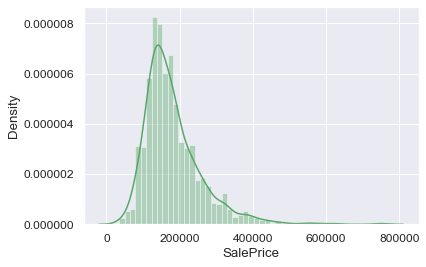

In [131]:
sns.distplot(update_train_df['SalePrice'], color = 'g')

### Graphing every Categorical Datatype Column (x) vs the SalesPrice (y)

<ipython-input-132-1467388c969e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(16, 8))
<ipython-input-132-1467388c969e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(16, 8))
<ipython-input-132-1467388c969e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, 

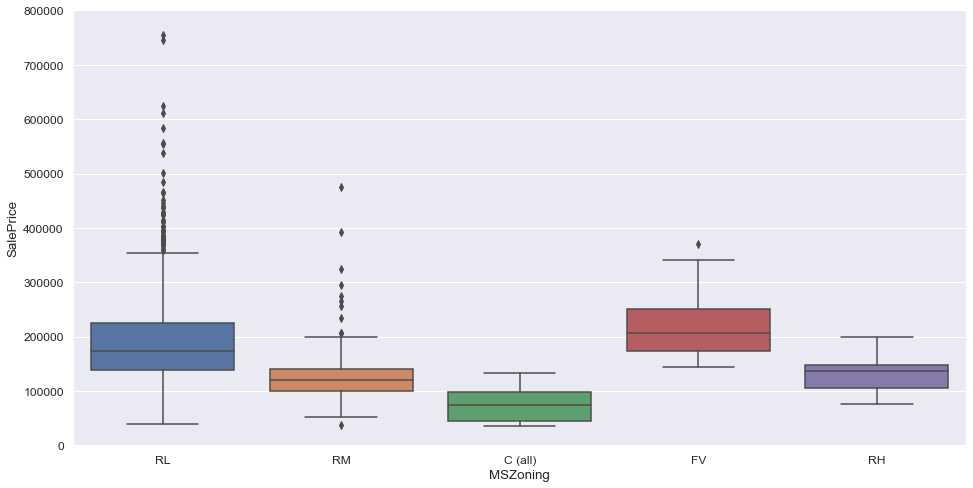

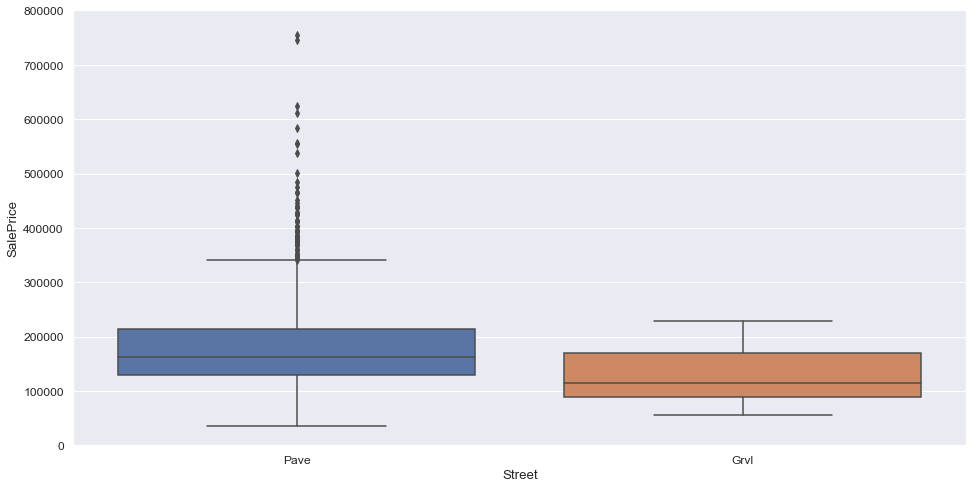

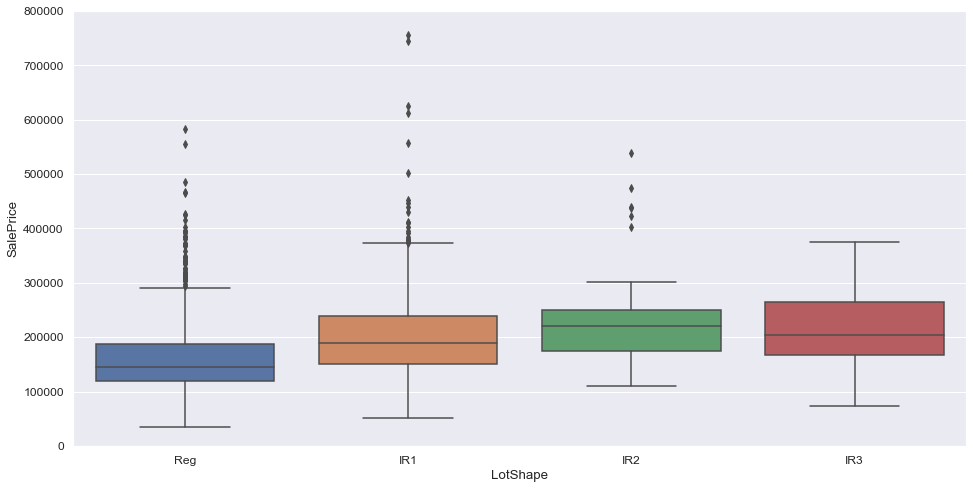

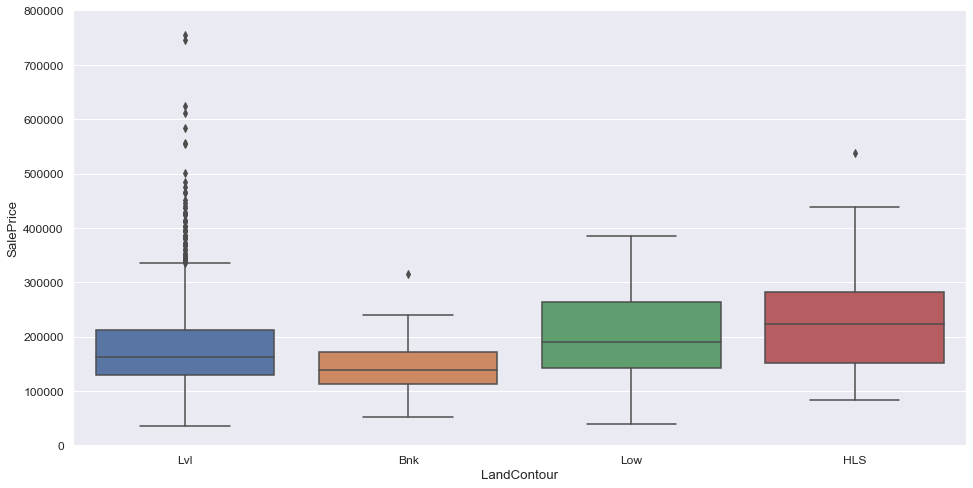

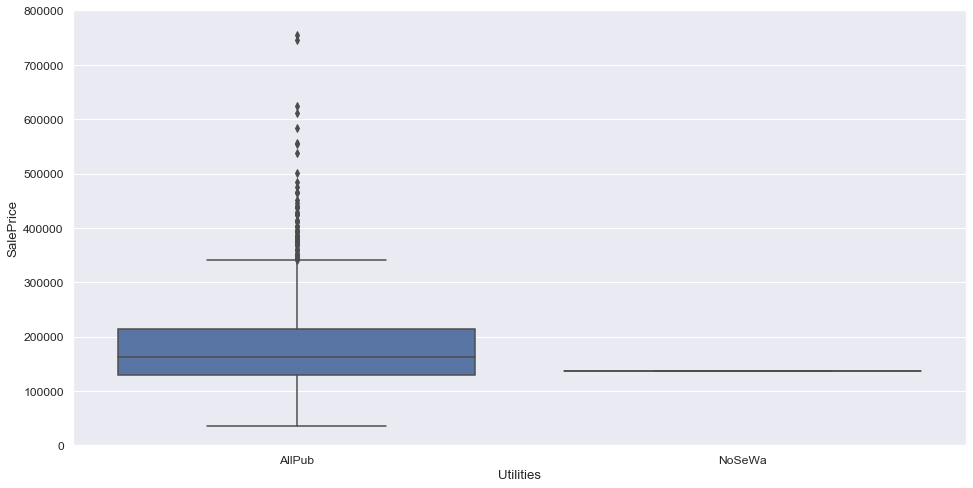

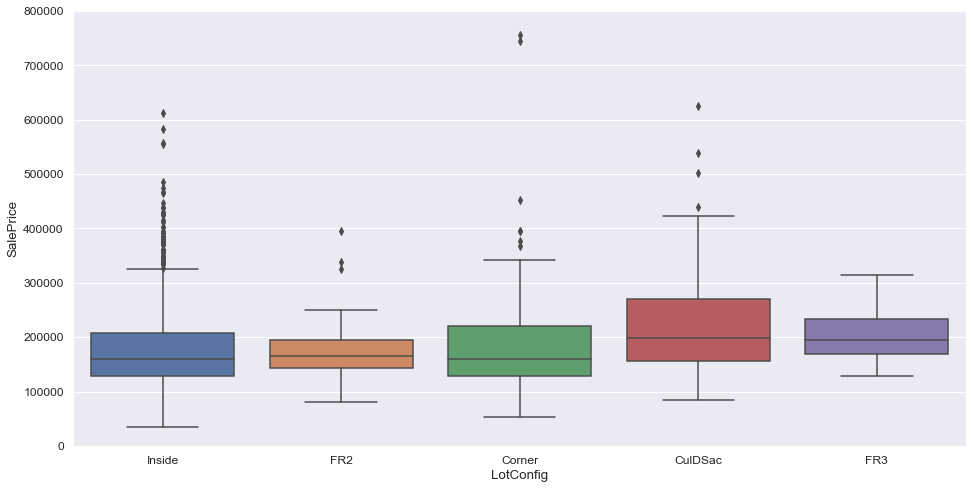

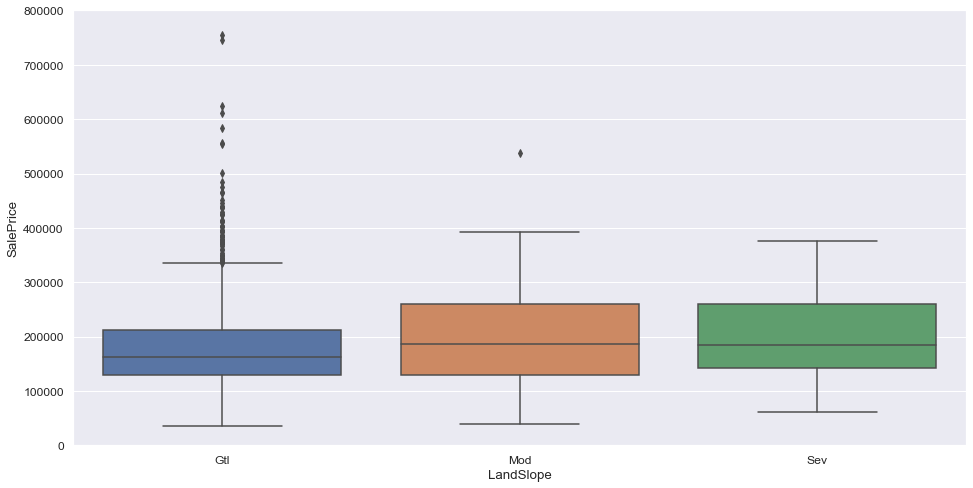

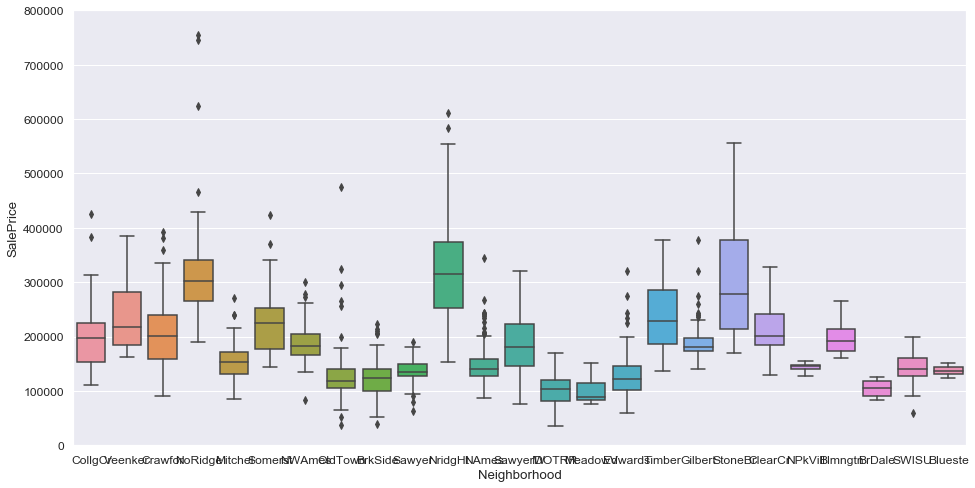

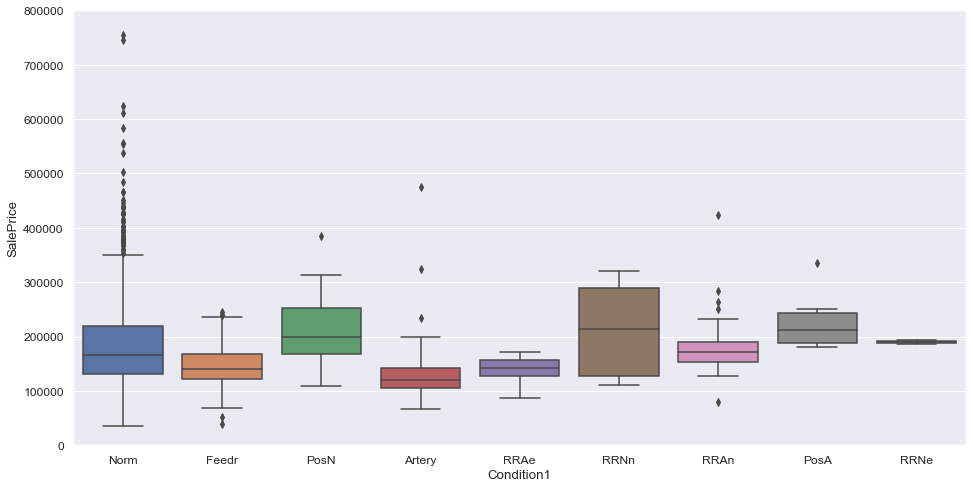

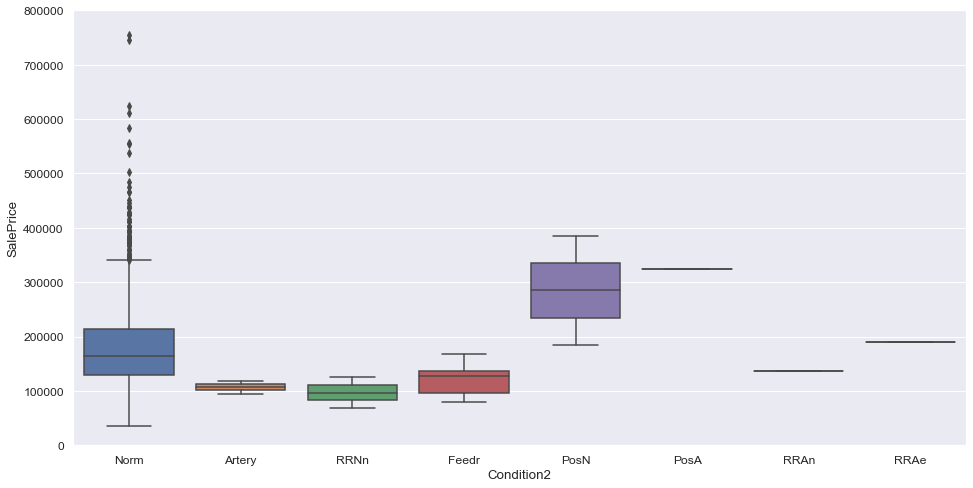

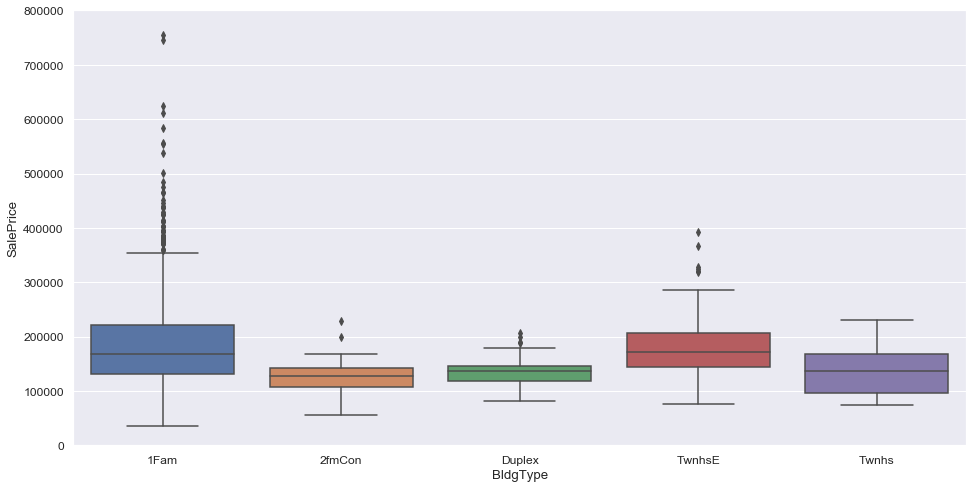

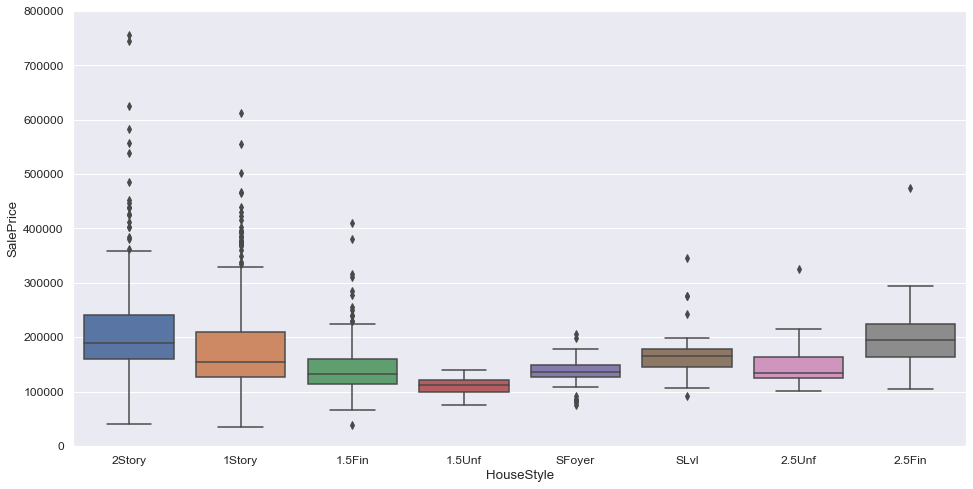

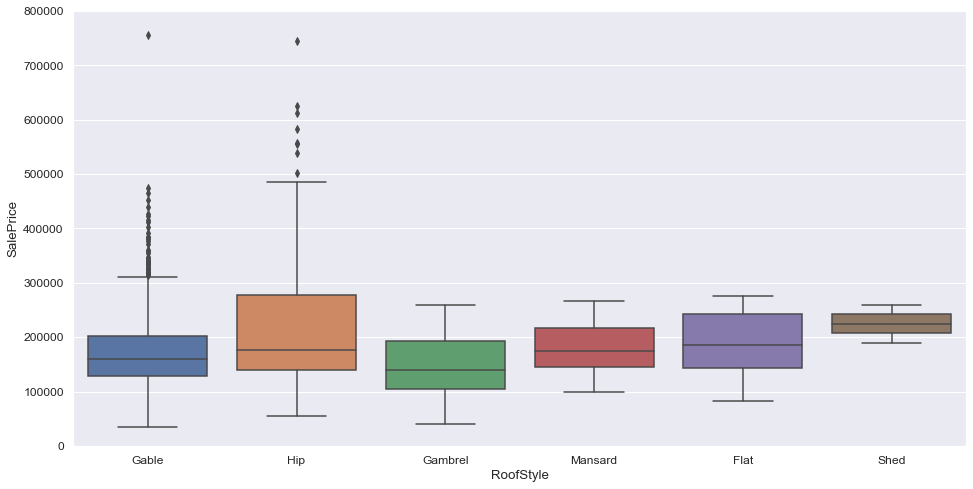

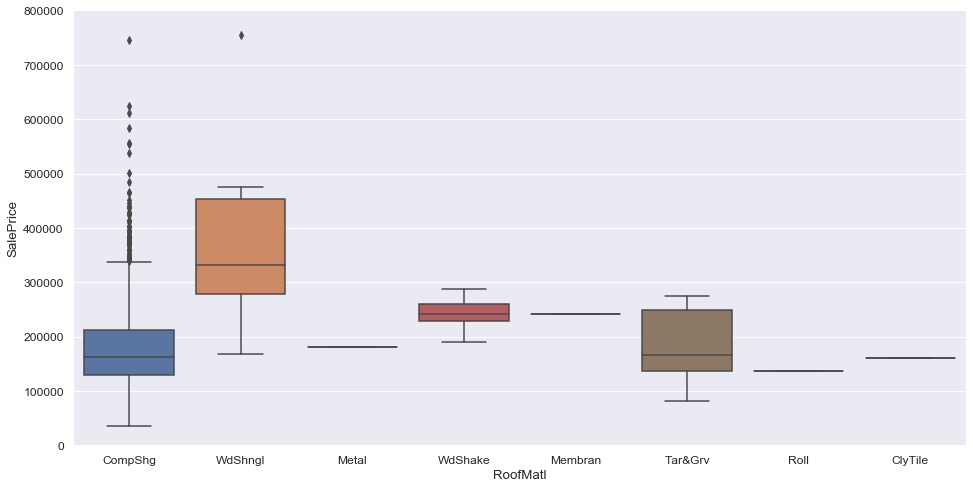

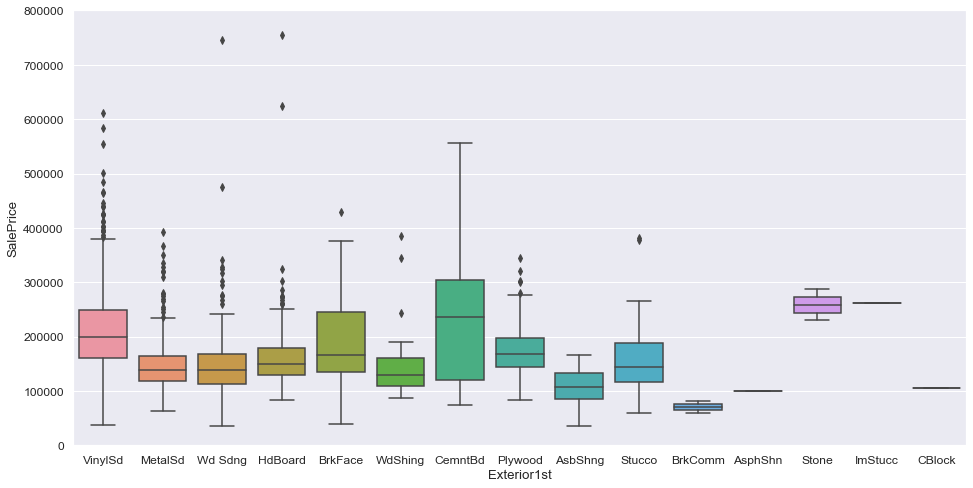

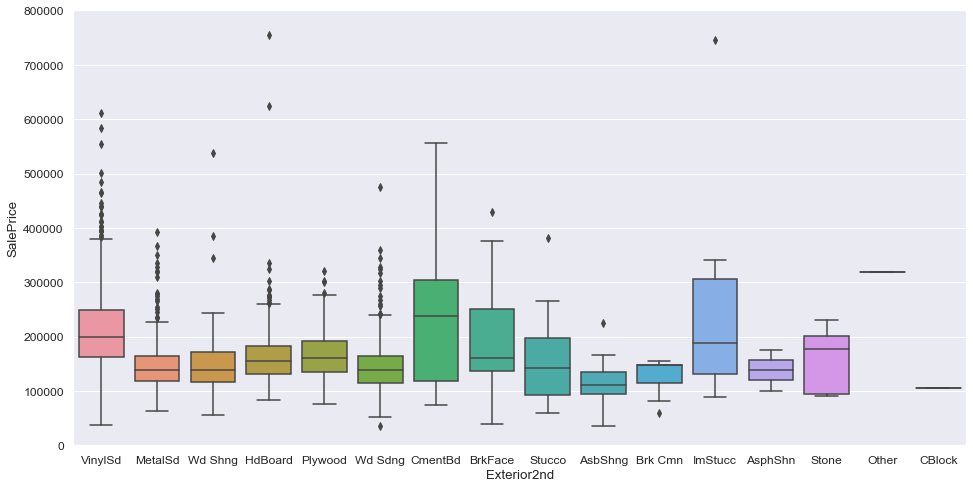

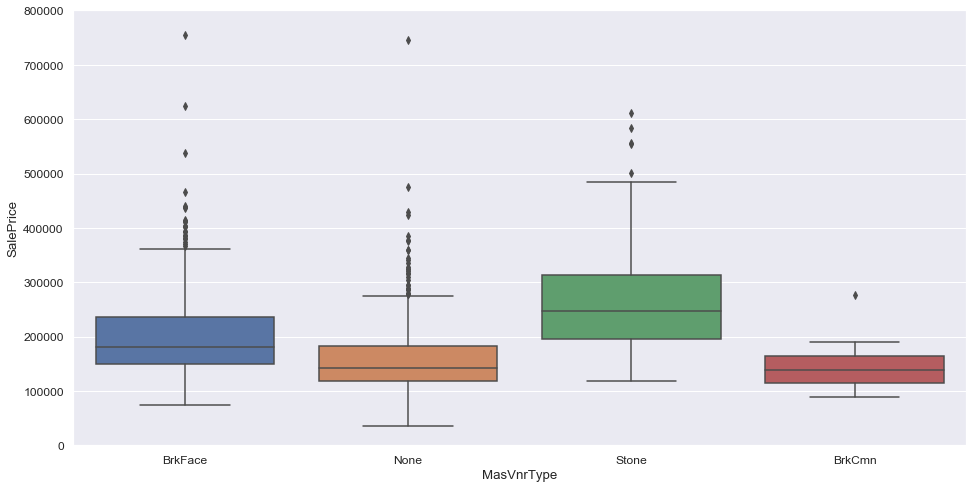

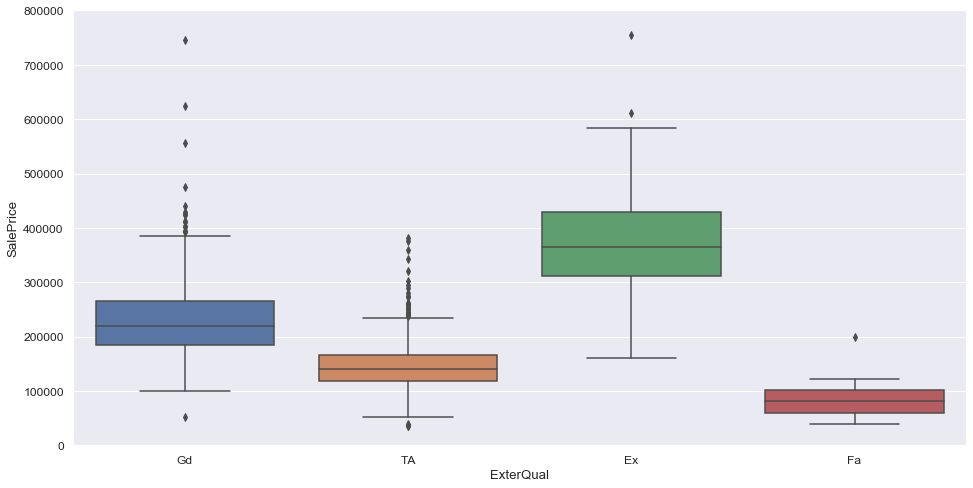

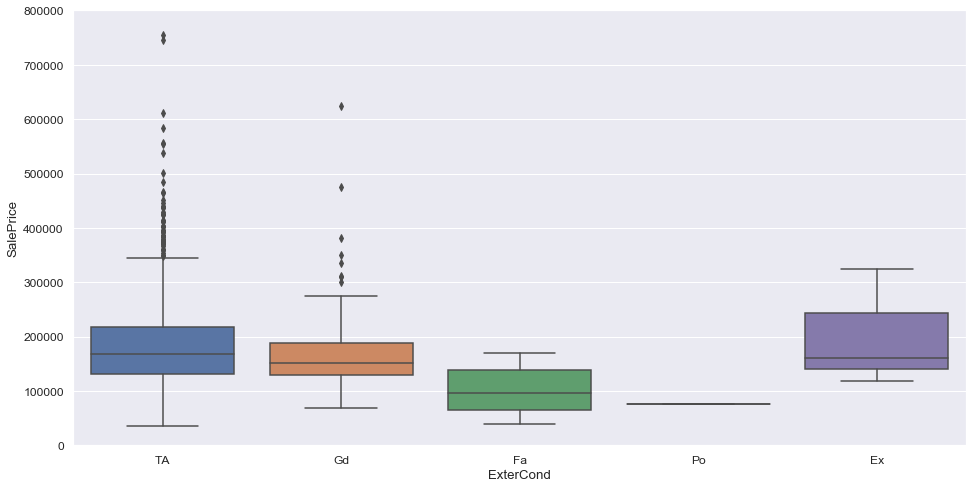

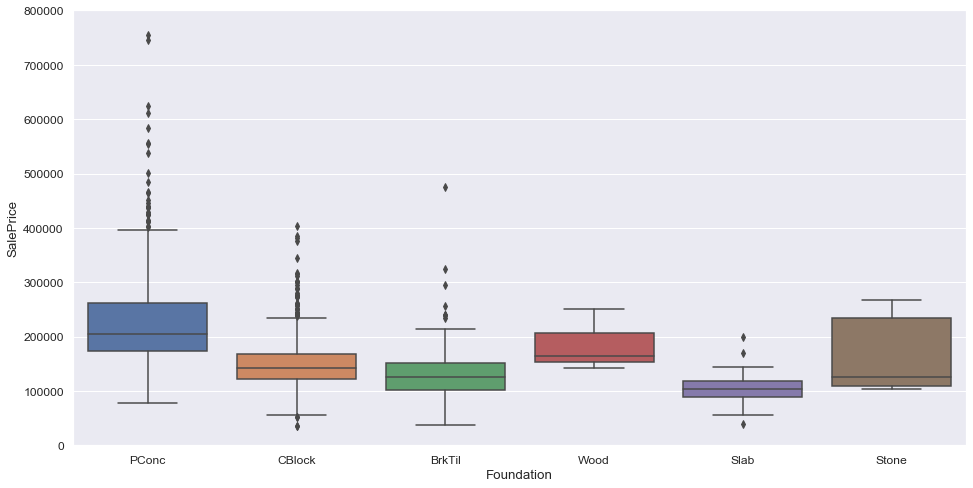

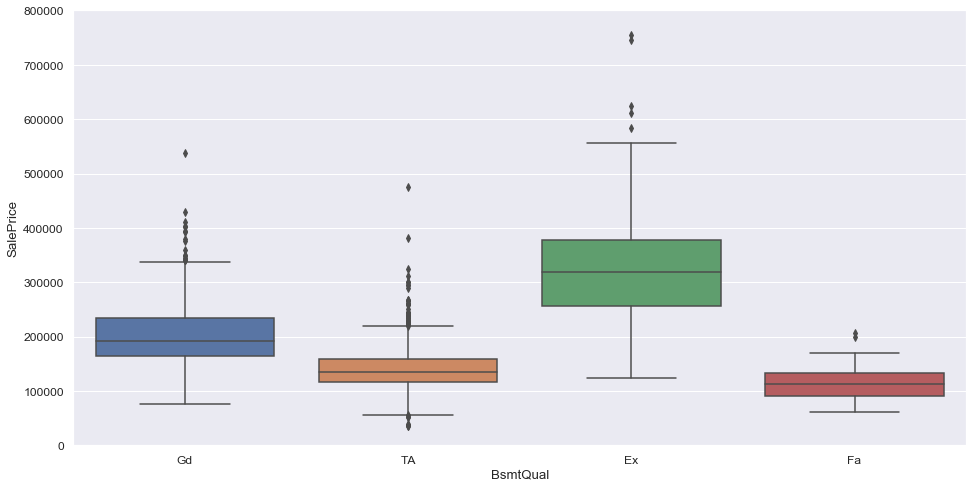

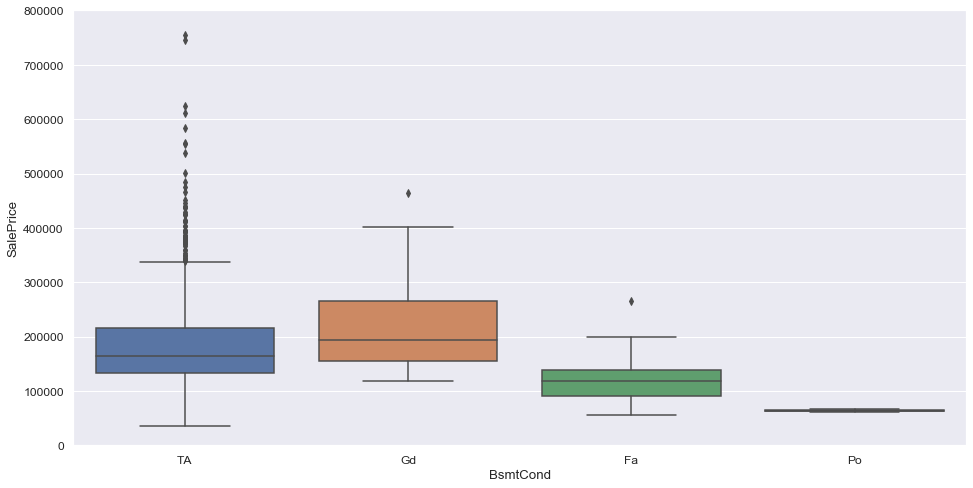

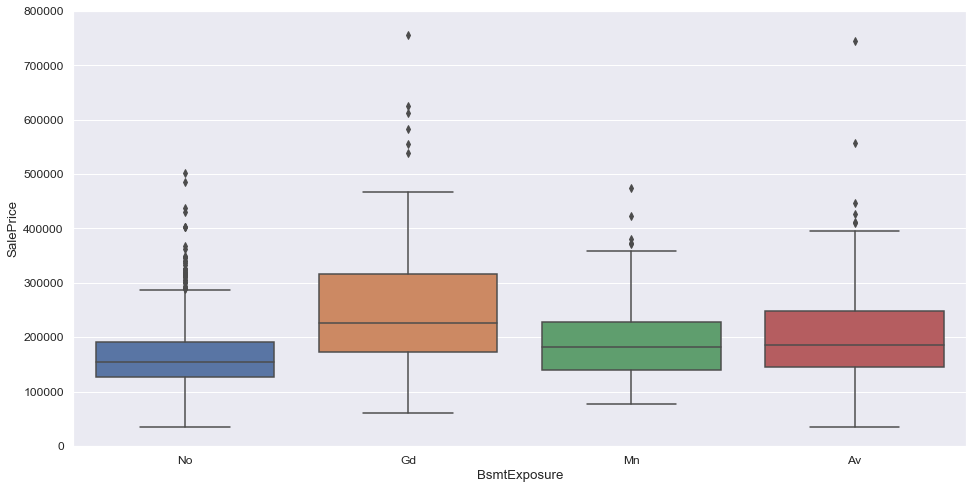

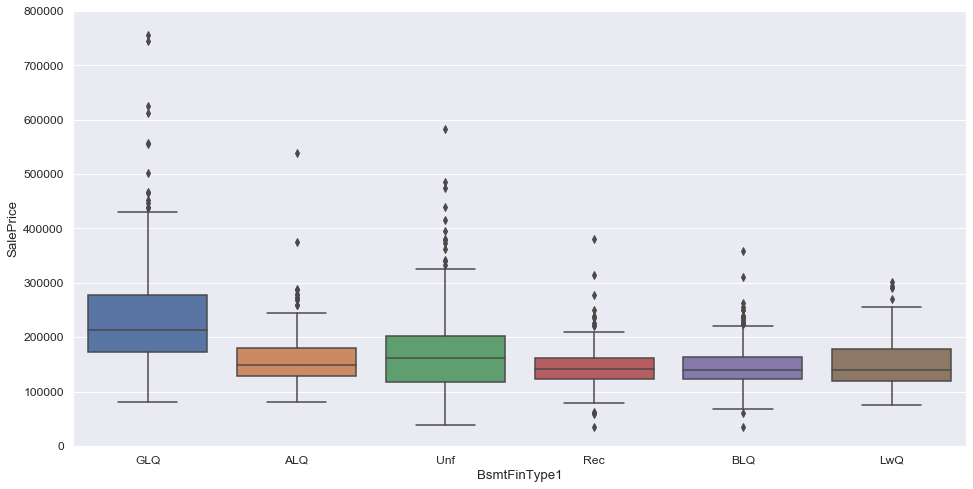

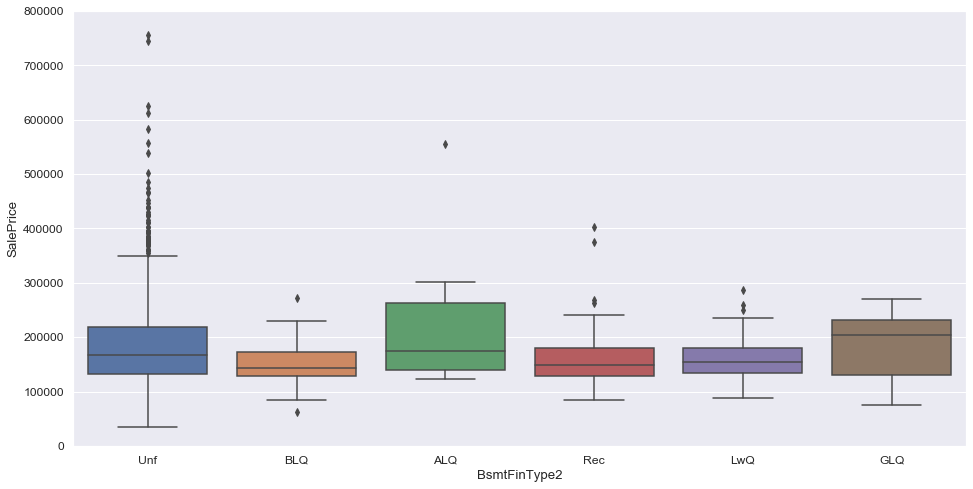

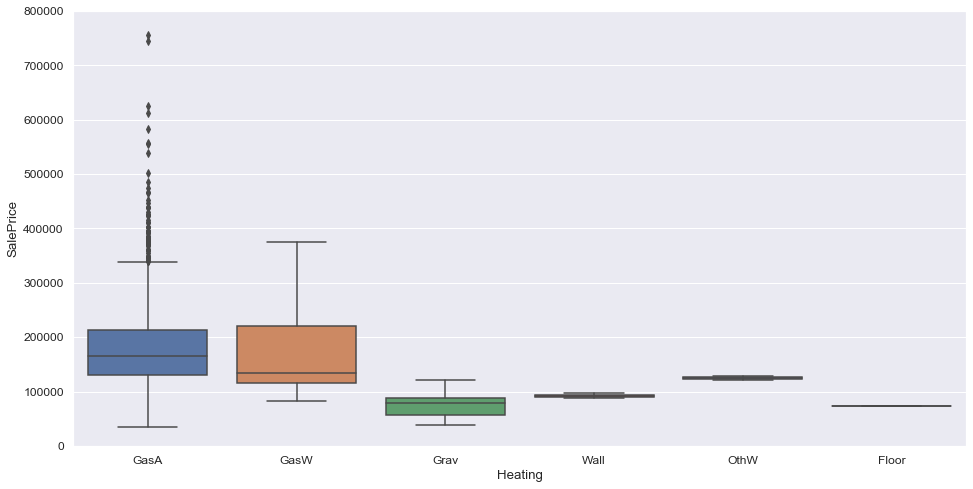

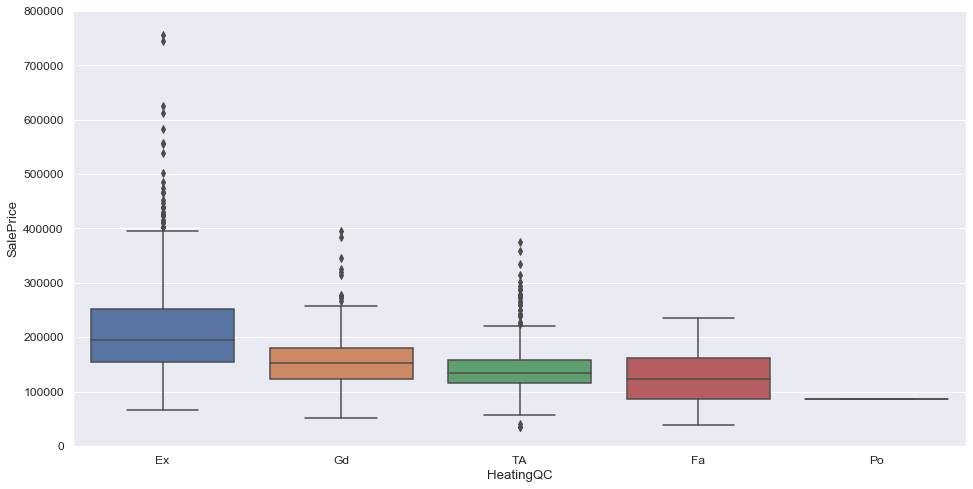

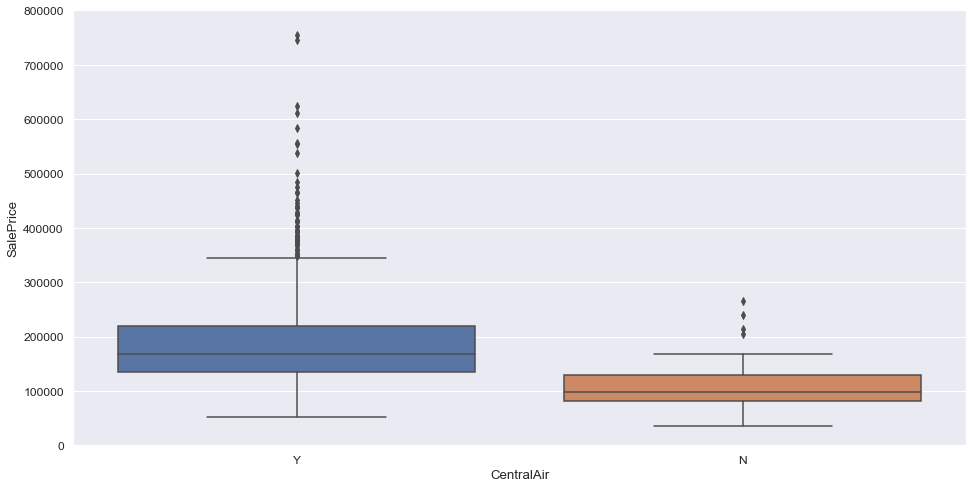

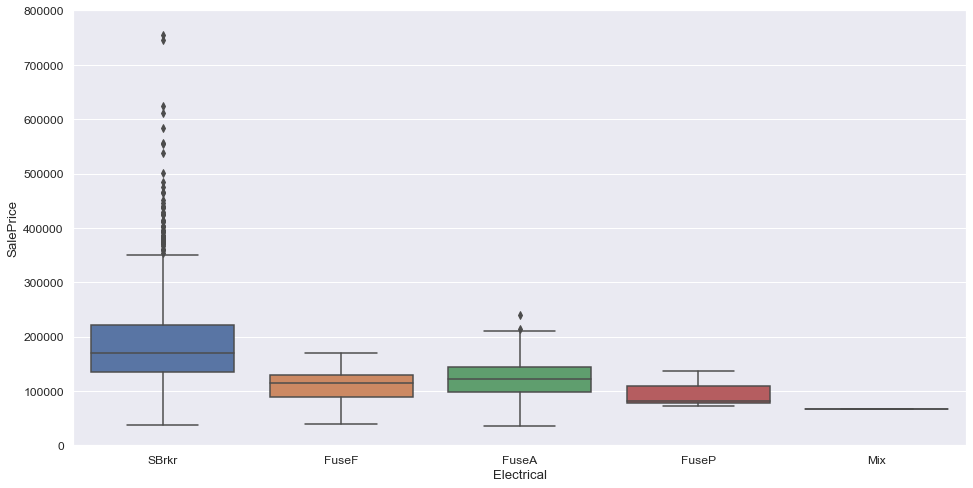

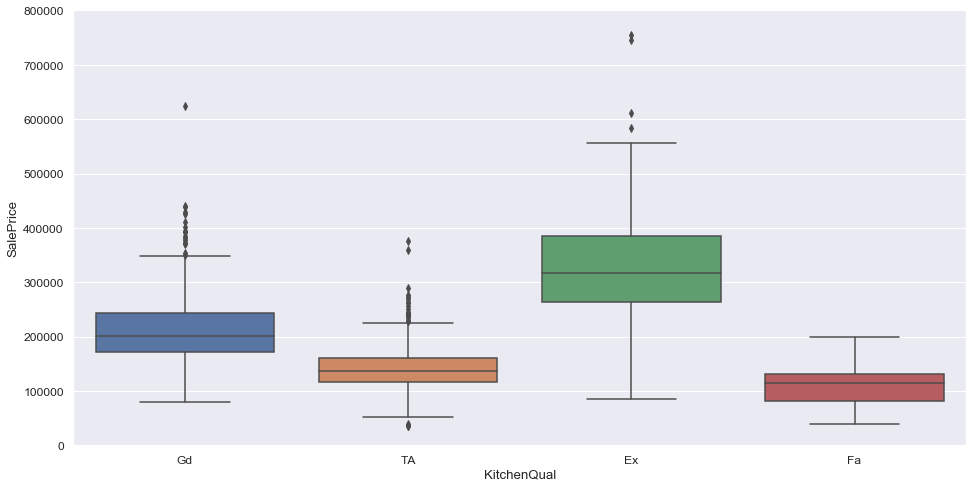

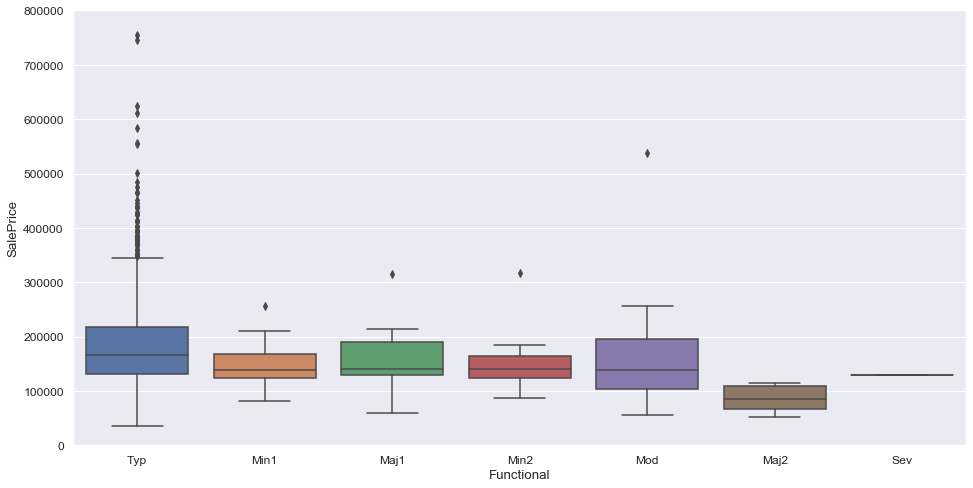

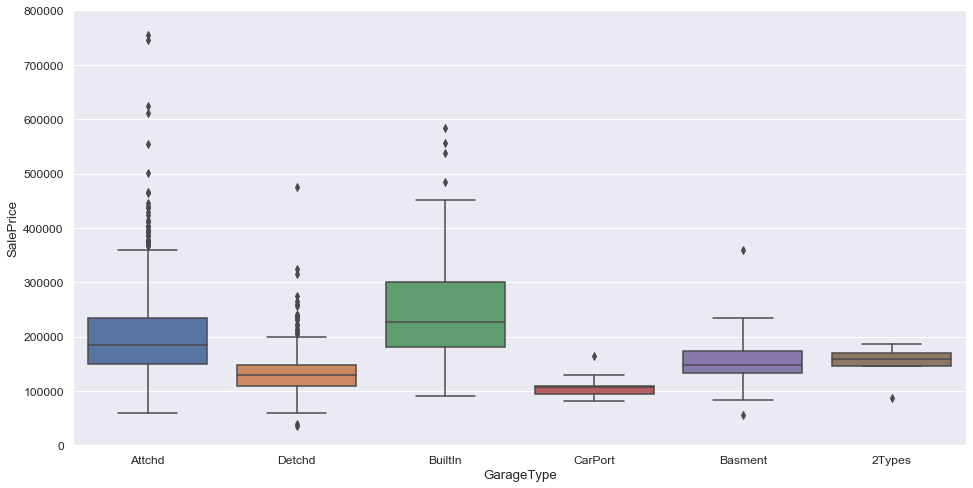

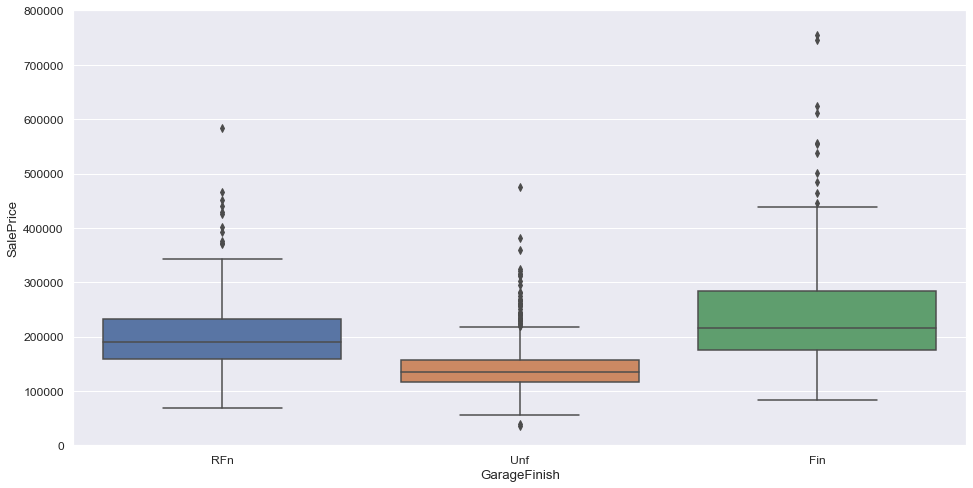

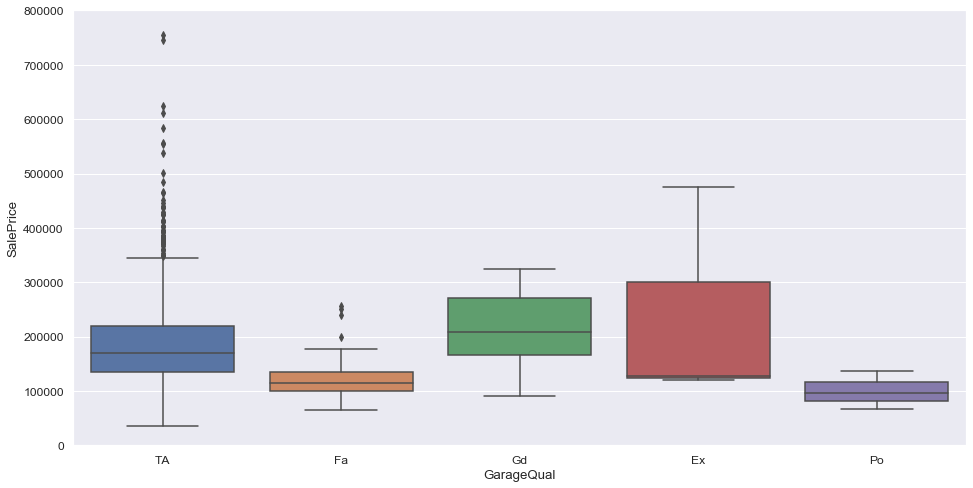

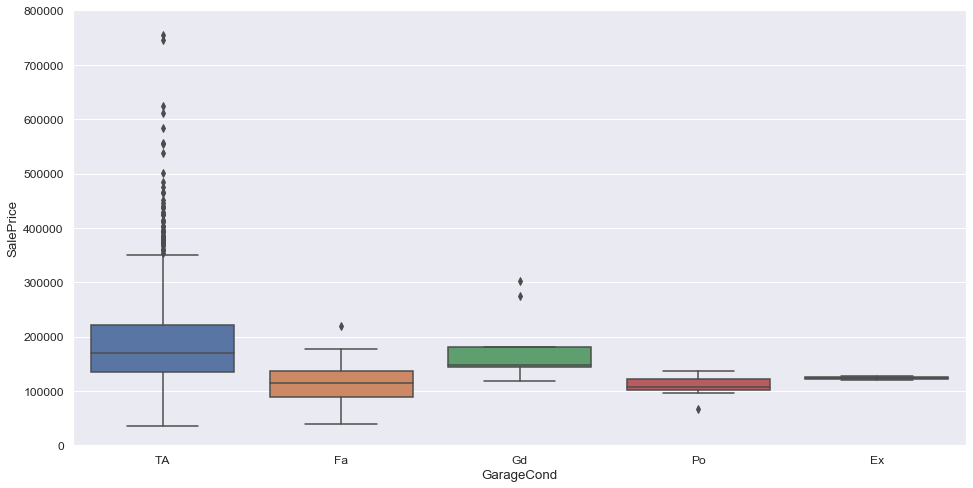

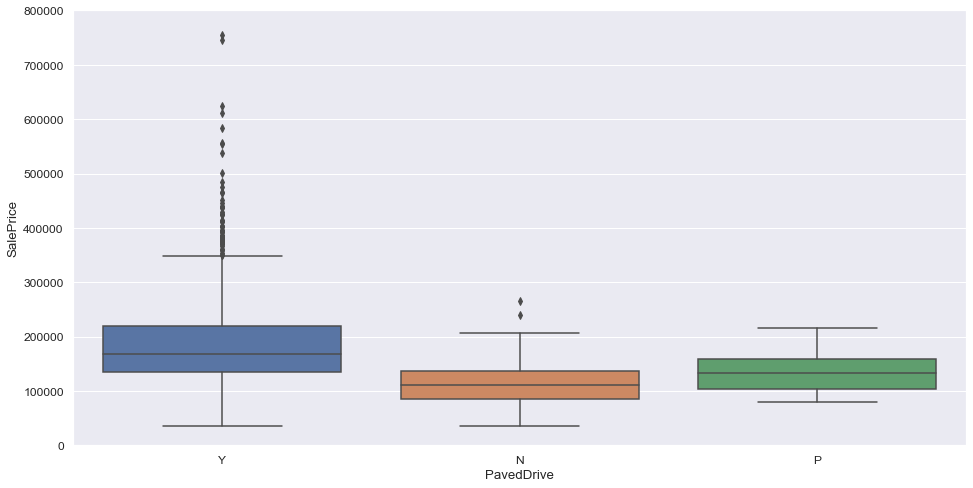

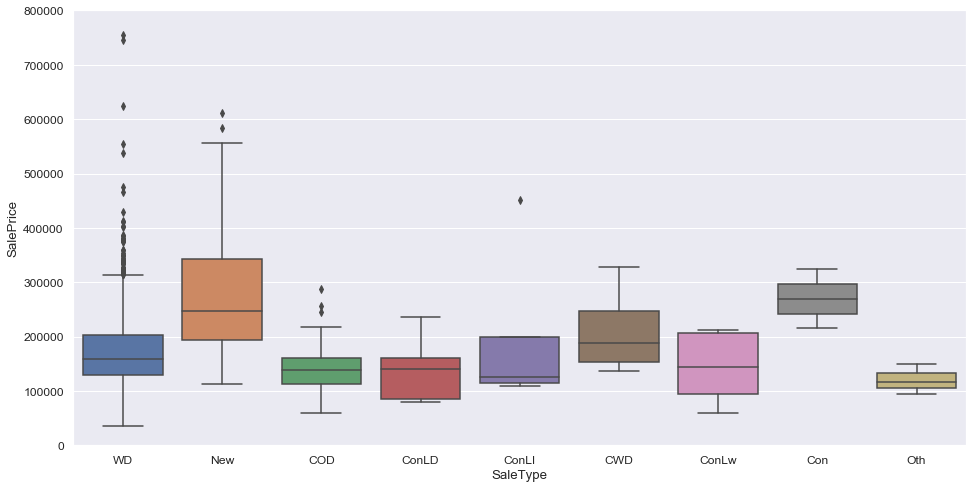

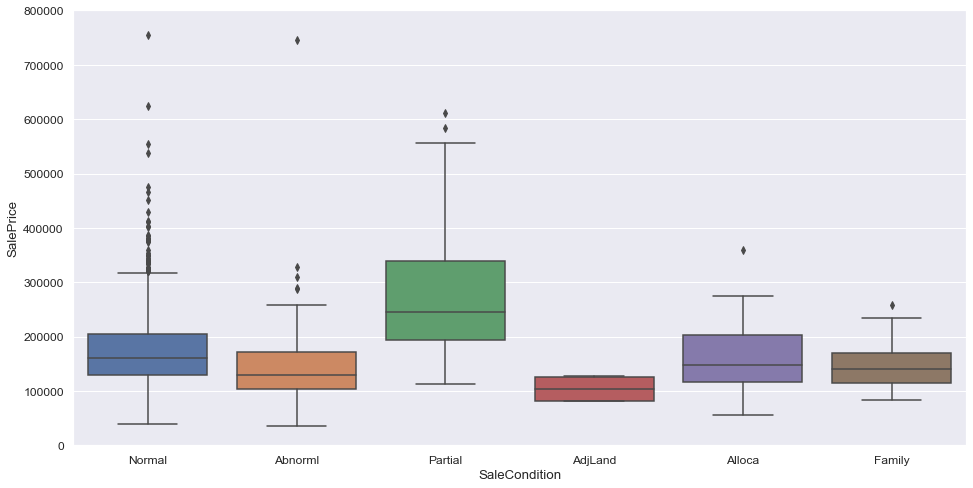

In [132]:
for (column_name, column_data) in update_train_df.iteritems():
    if is_object_dtype(column_data): ## IF not Numerical Datatype
        
        data = pd.concat([update_train_df['SalePrice'], column_data], axis=1)
        f, ax = plt.subplots(figsize=(16, 8))
        fig = sns.boxplot(x=column_name, y="SalePrice", data=data)
        fig.axis(ymin=0, ymax=800000);

        # ax.figure.savefig('Pics/SalePrice '+ column_name +'.png')

### Graphing Numerical Data Columns (x) with the Sales Price (y)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

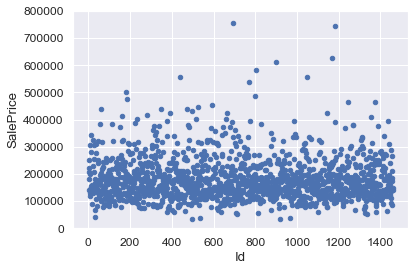

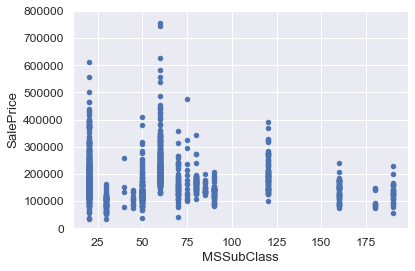

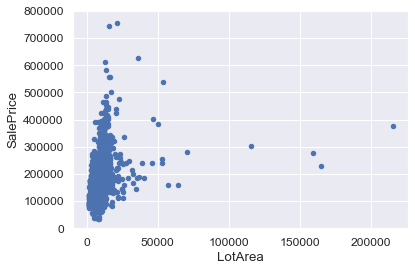

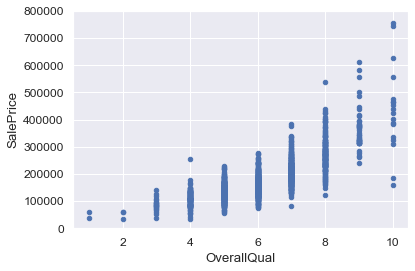

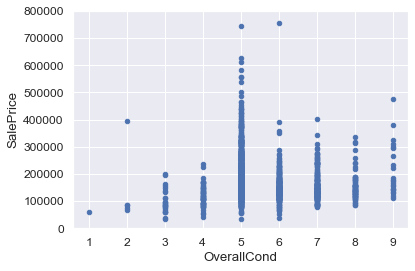

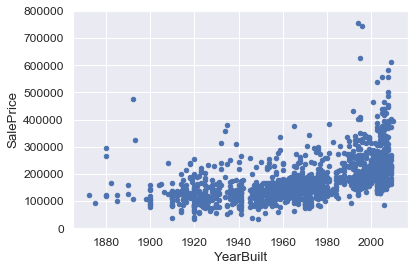

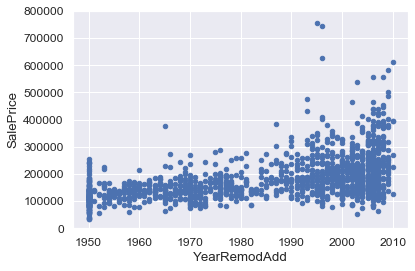

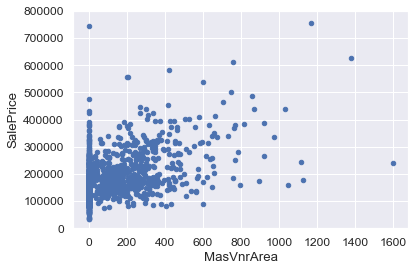

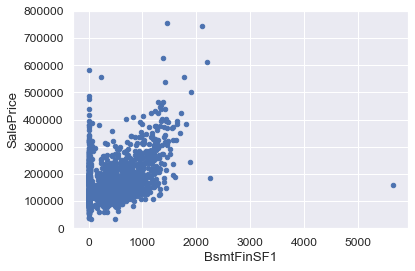

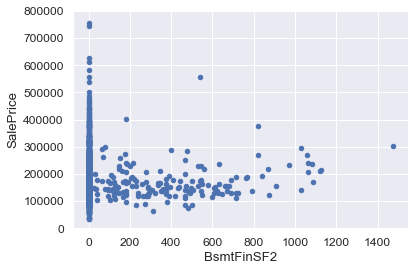

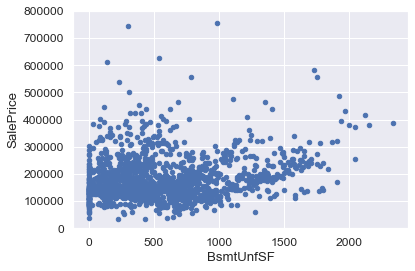

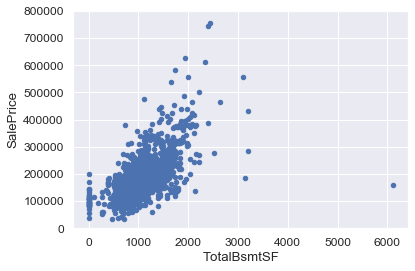

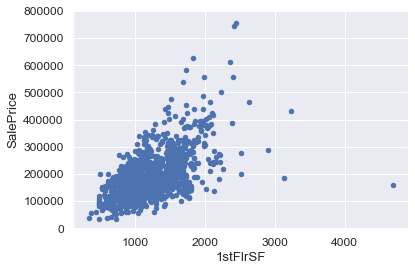

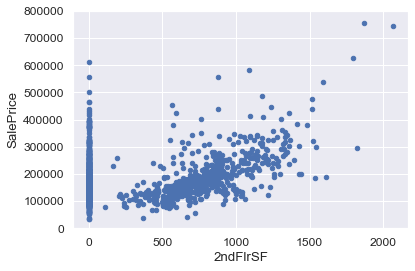

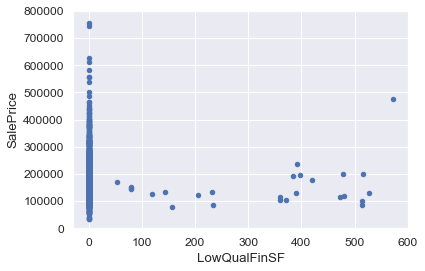

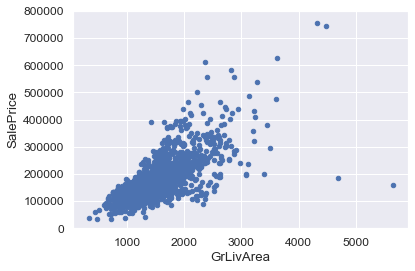

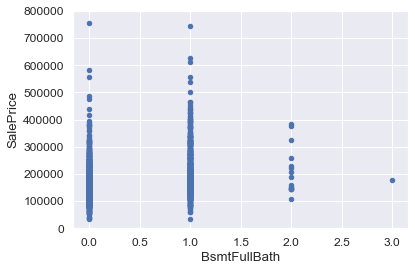

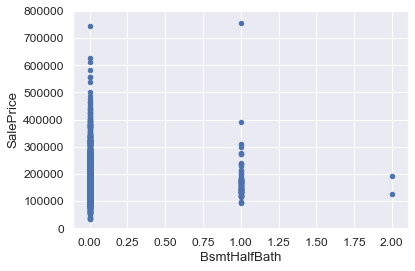

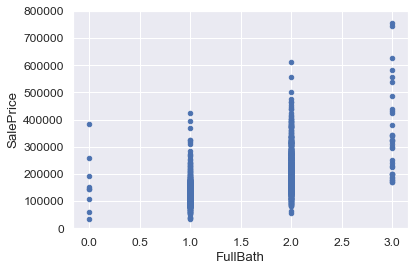

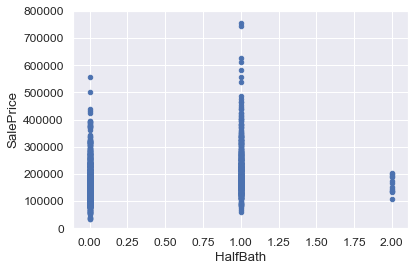

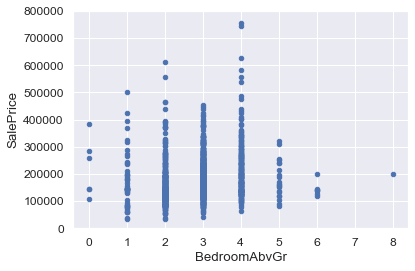

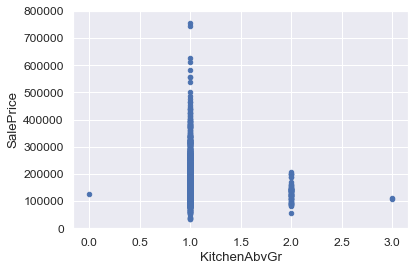

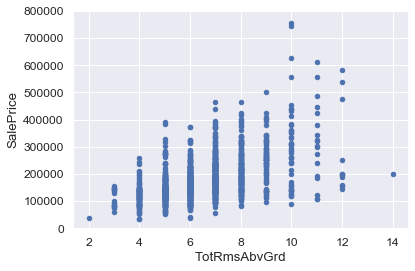

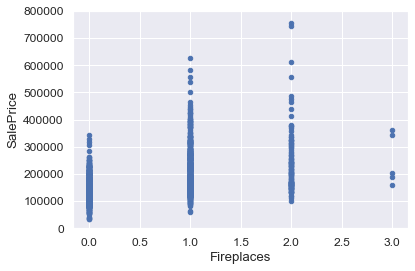

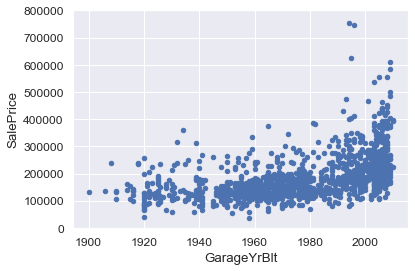

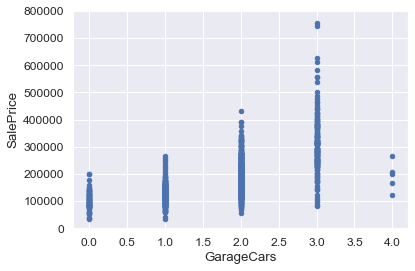

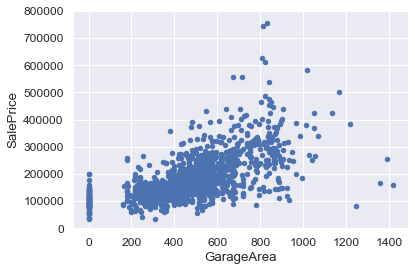

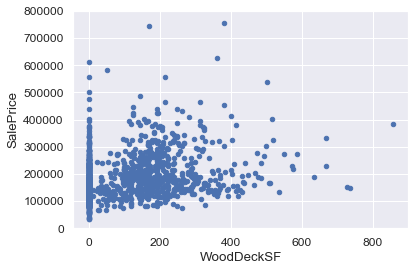

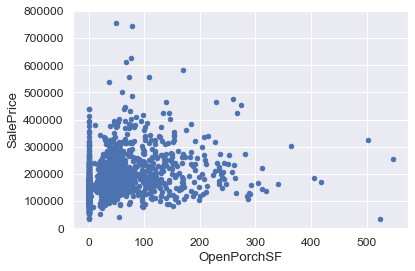

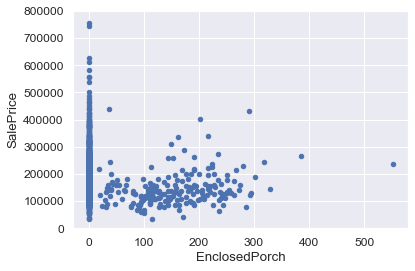

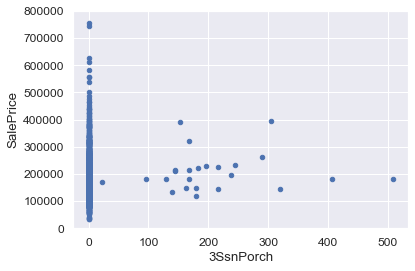

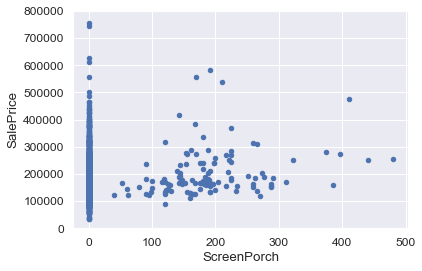

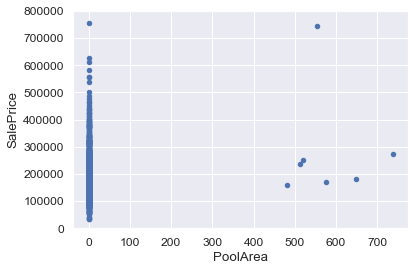

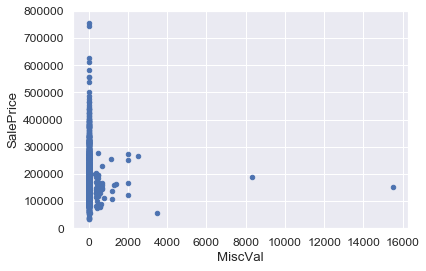

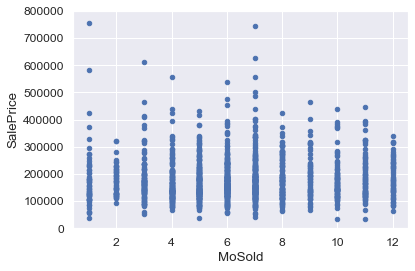

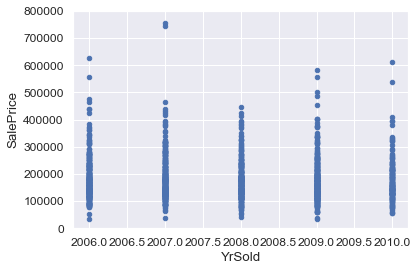

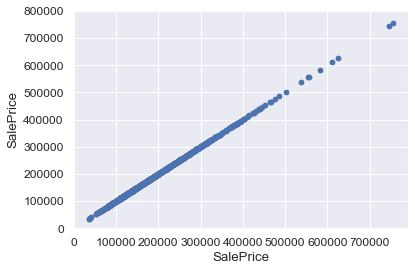

In [133]:
from pandas.api.types import is_numeric_dtype

for (colName, colData) in update_train_df.iteritems():
    if is_numeric_dtype(colData): ## IF NUMERICAL DATATYPE!!!!
        
        data = pd.concat([update_train_df['SalePrice'], colData], axis=1)
        data.plot.scatter(x=colName, y='SalePrice', ylim=(0,800000));
       # ax.figure.savefig('Pics/SalePrice '+ colName +'.png')
        
        

### Heat map to show the correlation between each feature and the SalesPrice

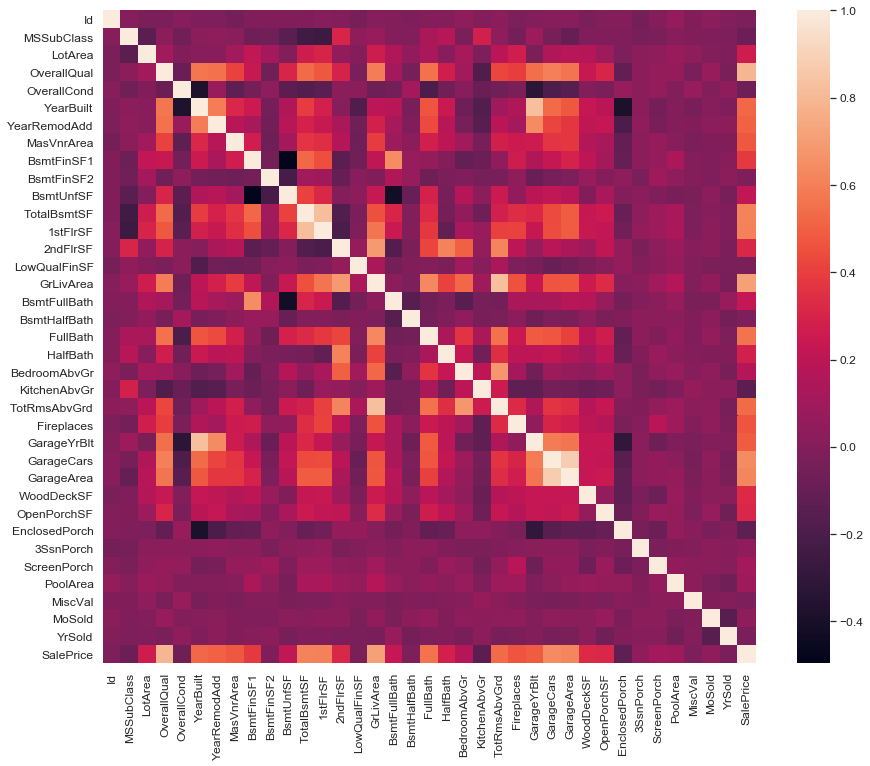

In [134]:
correlation_matrix = update_train_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(correlation_matrix,  square=True);

## Lets find the SalesPrice correlation Matrix with the TOP 10 Correlated Features

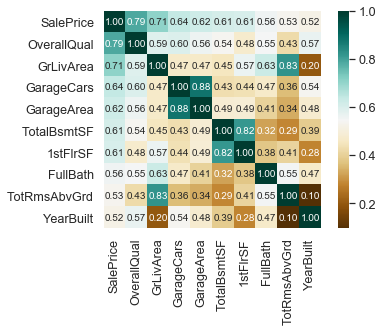

In [135]:
import numpy as np
k = 10 # Top 10 Features

cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(update_train_df[cols].values.T)
sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cmap="BrBG", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

##### Plotting everything against everything using pairplots (40 x 40)

In [136]:
# sns.pairplot(data = update_train_df)

### Fill in Missing Values (Numerical Data) in the training data

* We can fill in with like "median" values

In [137]:
from pandas.api.types import is_numeric_dtype

for (colName, colData) in update_train_df.iteritems():
    
    if is_numeric_dtype(colData):
        update_train_df[colName] = colData.fillna(colData.median())
    
    # Else its a Categorical Data Type and we cannot fill it in with a numeber !
    else:
        update_train_df[colName] = colData.fillna('Missing')

<ipython-input-137-513c6e694ea5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_train_df[colName] = colData.fillna(colData.median())
<ipython-input-137-513c6e694ea5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_train_df[colName] = colData.fillna('Missing')


### Lets check and verify that there is no more missing values left

In [138]:
(update_train_df.isnull().sum().sort_values(ascending=False)/update_train_df.shape[0])[:10]

SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
dtype: float64

### Combining Columns

So Lets create a new feature (column) that represents the total square footage of a house, which includes the Basement (TotalBsmtSF) and the General Living Area (GrLivArea) into a TotalSF Column.




In [139]:
update_train_df['TotalSF'] = update_train_df['TotalBsmtSF'] + update_train_df['GrLivArea']

<ipython-input-139-f4692a6825e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_train_df['TotalSF'] = update_train_df['TotalBsmtSF'] + update_train_df['GrLivArea']


### Lets Drop some Columns including:

* Ones that correlate less

* Were Dropping GarageArea since its redudent to the column GarageCar but has a weaker correlation with the SalesPrice


In [140]:
update_train_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Updated Correlation Matrix

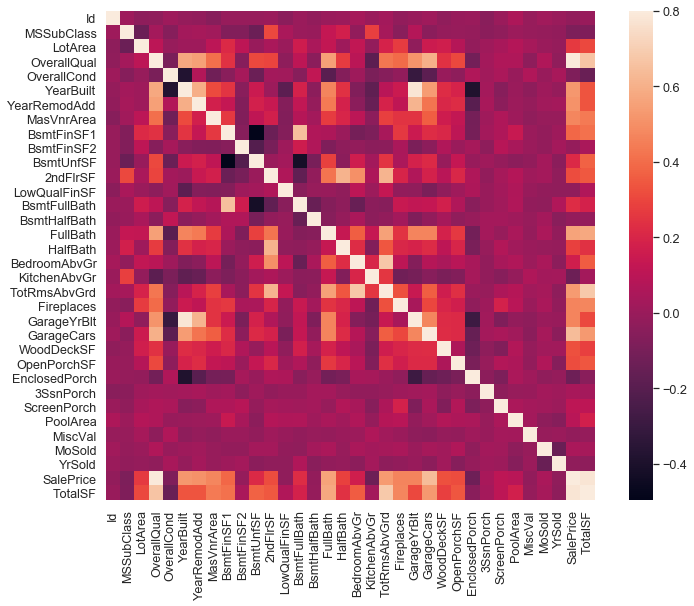

In [141]:
corrmat =update_train_df.corr()
f, ax = plt.subplots(figsize = (12,9))

sns.heatmap(corrmat, vmax =.8, square = True)


### Now lets see our Top 10 Features

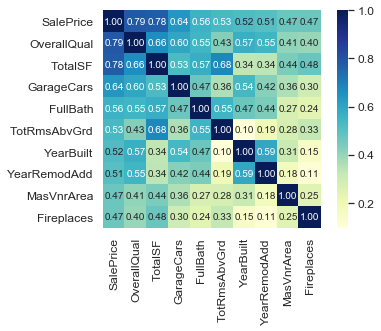

In [142]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(update_train_df[cols].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Lets Standardize the Numerical data first!!

Standardization is Super Common thing to DO!!!

What is Standardization? Standardization is dividing the values by the standard deviation of the feature data using a sklearn preprocessing package called "StandardScaler".

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

**sklearn.preprocessing.StandardScaler**

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

We should standardize only the Numerical Features First so first check for the datatype of the values!

In [143]:
# Standardize only numerical features first
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dfs = []

final_train_df = update_train_df.copy()

for (colName, colData) in final_train_df.iteritems():
    
    if is_numeric_dtype(colData) and colName != 'Id':
        
        dfs.append(pd.DataFrame(scaler.fit_transform(final_train_df[[colName]]), columns=[colName]))
        
        final_train_df.drop([colName], axis=1, inplace=True)

dfs.insert(0, final_train_df)

final_train_df = pd.concat(dfs, axis=1, sort=True)

final_train_df.head()

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,-0.008372
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.059386
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.161672
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,-0.121330
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,0.935372


### Now lets classify all the Categorical Variables are either 1 or 0, if the feature exists or not

Convert categorical variable into **dummy/indicator variables.**


It's called **One-hot encoding** which is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [144]:
final_train_df = pd.get_dummies(update_train_df.drop(['Id'], axis=1))

final_train_df[0:10]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,50,14115,5,5,1993,1995,0.0,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,20,10084,8,5,2004,2005,186.0,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,60,10382,7,6,1973,1973,240.0,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,50,6120,7,5,1931,1950,0.0,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,190,7420,5,6,1939,1950,0.0,851,0,140,...,0,0,0,1,0,0,0,0,1,0


### Now remember the Test Data from earlier? We must update it as well so we can run models on the Data

* Lets PreProcess it!!

In [145]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [146]:
final_test_df = test_df.drop(['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage'], axis='columns')

for (colName, colData) in final_test_df.iteritems():
    
    if is_numeric_dtype(colData):
        
        final_test_df[colName] = colData.fillna(colData.median())
        
    else:
        
        final_test_df[colName] = colData.fillna('Missing')
        
# Create new feature to represent total square feet of house (TotalSF)
final_test_df['TotalSF'] = final_test_df['TotalBsmtSF'] + final_test_df['GrLivArea']


# Drop unnecessary Columns!

final_test_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Standardize only numerical features first!

dfs = []

for (colName, colData) in final_test_df.iteritems():
    
    if is_numeric_dtype(colData) and colName != 'Id':
        
        dfs.append(pd.DataFrame(scaler.fit_transform(final_test_df[[colName]]), columns=[colName]))
        
        final_test_df.drop([colName], axis=1, inplace=True)

        
dfs.insert(0, final_test_df)

final_test_df = pd.concat(dfs, axis=1, sort=True)

# one hot encode all the categorial vars

final_test_df = pd.get_dummies(final_test_df.drop(['Id'], axis=1))

final_test_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874711,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,-0.650461,...,0,0,0,1,0,0,0,0,1,0
1,-0.874711,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,-0.339225,...,0,0,0,1,0,0,0,0,1,0
2,0.061351,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,-0.954831,...,0,0,0,1,0,0,0,0,1,0
3,0.061351,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,-0.526882,...,0,0,0,1,0,0,0,0,1,0
4,1.465443,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,1.059048,...,0,0,0,1,0,0,0,0,1,0


## Lets print the Columns Present in the Traning data that are not present in the Test Data

* Use **set()** 

* remember set logic!



In [147]:
missing_test_cols = list(set(final_train_df.columns.values).difference(set(final_test_df.columns.values)))
missing_test_cols

['Heating_Floor',
 'Condition2_RRAn',
 'Condition2_RRAe',
 'RoofMatl_Metal',
 'Exterior1st_ImStucc',
 'Condition2_RRNn',
 'SalePrice',
 'RoofMatl_Roll',
 'Exterior2nd_Other',
 'Exterior1st_Stone',
 'RoofMatl_Membran',
 'Utilities_NoSeWa',
 'RoofMatl_ClyTile',
 'GarageQual_Ex',
 'Heating_OthW',
 'Electrical_Mix',
 'HouseStyle_2.5Fin',
 'Electrical_Missing']

## Lets print the Columns Present in the Test data that are not present in the Training Data


In [148]:
# print cols present in test data and not present in train data
missing_train_cols = list(set(final_test_df.columns.values).difference(set(final_train_df.columns.values)))
missing_train_cols

['Exterior1st_Missing',
 'SaleType_Missing',
 'Functional_Missing',
 'KitchenQual_Missing',
 'Utilities_Missing',
 'Exterior2nd_Missing',
 'MSZoning_Missing']

### Lets add Columns present in the train and not in the test

In [149]:
# add cols present in train and not in test
for col in missing_test_cols:
    final_test_df[col] = '0'
    
# drop cols present in test and not in train
final_test_df.drop(missing_train_cols, axis=1, inplace=True)
final_test_df.drop(['SalePrice'], axis=1, inplace=True)

### Lets verify shape is same except for SalePrice column

In [150]:
print(final_train_df.shape)
print(final_test_df.shape)

(1460, 278)
(1459, 277)


## Let's Finally Run some Machine Learning Models!! 

Lets First Run **Linear Regression** using "SalesPrice" Column as what to Predict



Steps to Perform Linear Regression

1. Stamdardized the Data (numerical and categorical)


The Problems with Linear Regression is that it's very common for **overfitting** By utilizing features that have **low correlation with sales price** (AKA the Predictor), the Linear Regression the model is likely to be *over-optimizing* to the training set.

## Let's Split the Data into:

x_train, y_train

x_test

In [151]:
x_train = final_train_df.drop(['SalePrice'], axis=1)

In [152]:
y_train = final_train_df[['SalePrice']]

In [153]:
x_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [154]:
x_test = final_test_df
x_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Exterior2nd_Other,Exterior1st_Stone,RoofMatl_Membran,Utilities_NoSeWa,RoofMatl_ClyTile,GarageQual_Ex,Heating_OthW,Electrical_Mix,HouseStyle_2.5Fin,Electrical_Missing
0,-0.874711,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,-0.650461,...,0,0,0,0,0,0,0,0,0,0
1,-0.874711,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,-0.339225,...,0,0,0,0,0,0,0,0,0,0
2,0.061351,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,-0.954831,...,0,0,0,0,0,0,0,0,0,0
3,0.061351,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,-0.526882,...,0,0,0,0,0,0,0,0,0,0
4,1.465443,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,1.059048,...,0,0,0,0,0,0,0,0,0,0


### Linear Regression performed on Data

* Now that our data is split up into training data (x_train and y_train) we can Import Linear Regression from sklearn and we can pass in our training data to build the model!

* Then we can use that trained model object with our testing data (x_test) to make predictions for the sales price!


In [155]:
from sklearn.linear_model import LinearRegression # Import Linear Regression from

linear_regression = LinearRegression() # Create our Object

linear_regression.fit(x_train, y_train)  # Pass in both x_train and y_train

# With our Model "TRAINED" we can pass in our testing data!

predictions = linear_regression.predict(x_test) 

# The coefficients
# print('Coefficients: \n', linear_regression.coef_)

# Print out the first ten predictions
predictions[0:10]

array([[-324838.83913862],
       [-335926.01449809],
       [-368992.59649295],
       [-350493.33125981],
       [ -30676.79490054],
       [-287490.291822  ],
       [-263264.70698269],
       [-360835.10904923],
       [-282580.91356002],
       [-253666.74880345]])

### Perform 6-fold cross validation


Cross-validation is a statistical method used to estimate the **skill of machine learning models.**

It is commonly used in applied machine learning to *compare and select a model* for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.



https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html



In [156]:
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import metrics

# Pass in the the estimator object that implements AKA 'Fits' the data which is our Linear Regression Model
# cv is equal to 6
scores = cross_val_score(linear_regression, x_train, y_train, cv = 6)

scores

In [157]:
scores

array([0.88779435, 0.89555727, 0.82114421, 0.74748082, 0.88199316,
       0.51806822])

### Now lets make Cross Validated Predictions

Where.

cvint, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. 
Possible inputs for cv are:

6 for 6-fold cross validation.


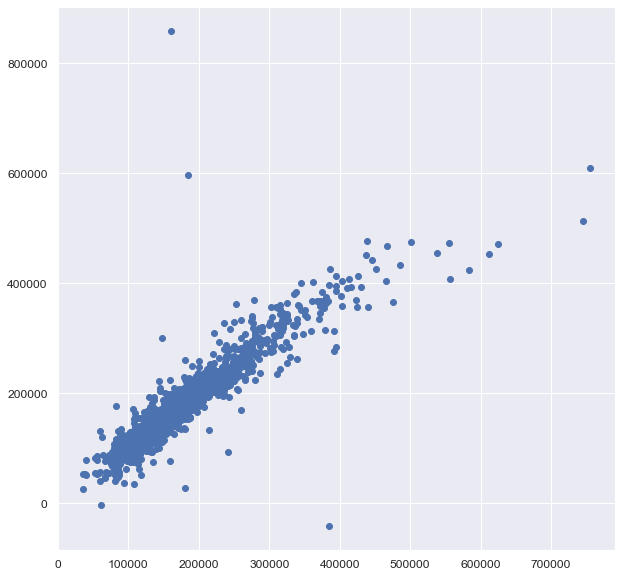

In [160]:
## Using Numpy
import numpy as np

predictions = cross_val_predict(linear_regression, x_train, y_train, cv = 6)

plt.figure(figsize = (10, 10))

plt.scatter(y_train, predictions)

### Get accuracy of model from cross validation

* Using **r squared** score


In [43]:
accuracy = metrics.r2_score(y_train, predictions)
accuracy

0.8021799607635554

## We will try to attack the classification problem using Ridge Regression and LASSO. We'll use some of the pre-processing and feature engineering we have already done.

* In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data.

* Lets preprocess the testing and training data, using Previous Feature Engineering we did.

    * Which means we should drop columns that don't correlate to the Sales Price


* 1. Drop columns with more than 15% missing data
* 2. Fill in Missing Data 

    * Fill in missing Numerical data with the median value
    * Fill in missing Categorical data data with "Missing".
* 3. Create New Column/Feature "TotalSF"
* 4. Drop Redundant columns



* Note we're not going to "Standardized" the data so we have to start with the orginal dataframe test_df since final_test_df from above is **Standardized** already and we need the regular non-standarized dataframe, look below at the dataframe and you will see why we need to do this!!


### Adjust the Training Data

In [44]:
# 1. Drop Columns with more than 15% data missing
final_train_df = train_.drop(['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage'], axis='columns')

# 2. Fill NA or missing values in data
for (colName, colData) in final_train_df.iteritems():
    if is_numeric_dtype(colData):
        final_train_df[colName] = colData.fillna(colData.median())
    else:
        final_train_df[colName] = colData.fillna('Missing')
        
# 3. create new feature to represent total square feet of house
final_train_df['TotalSF'] = final_train_df['TotalBsmtSF'] + final_train_df['GrLivArea']

# 4. drop unneeded columns esp those that are redundant
final_train_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

final_train_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,3343


### Adjust the Test Data Below

* Now perform the same adjustments to the test data as we did the training data

In [45]:
# 1. Drop Columns with more than 15% data missing
final_test_df = test_df.drop(['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage'], axis='columns')

# 2. Fill NA or missing values in data
for (colName, colData) in final_test_df.iteritems():
    if is_numeric_dtype(colData):
        final_test_df[colName] = colData.fillna(colData.median())
    else:
        final_test_df[colName] = colData.fillna('Missing')
        
# 3. create new feature to represent total square feet of house
final_test_df['TotalSF'] = final_test_df['TotalBsmtSF'] + final_test_df['GrLivArea']

# 4. drop unneeded columns esp those that are redundant
final_test_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

final_test_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,1778.0
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,2658.0
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,2557.0
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,2530.0
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,2560.0


#### Now we have both the final_train_df and final_test_df adjusted for the Categorical Data

## Lets print a Histogram of the Sales price of the Final Train Data

In [46]:
## Try and Adjust the size of the x-axis later??

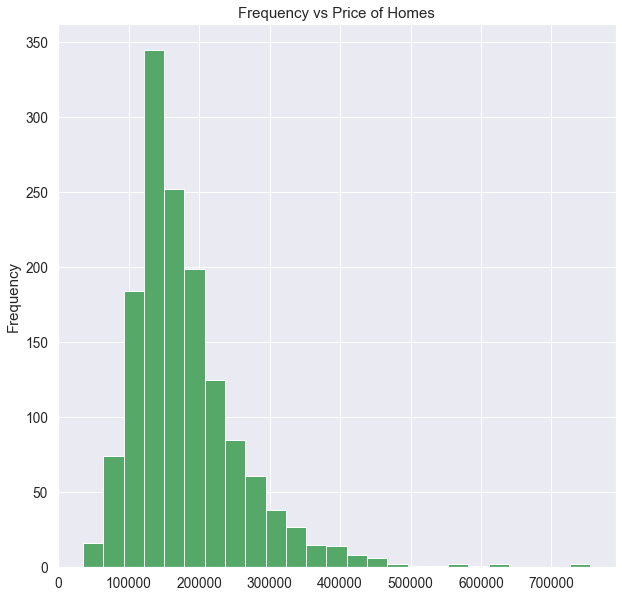

In [61]:
#final_train_df['SalePrice'].hist(color = 'g', bins = 25)

data = final_train_df['SalePrice']
data.plot( x = data, kind = 'hist',color = 'g', figsize = (10,10), bins = 25, title = 'Frequency vs Price of Homes')


### Nomality (look up!!!)

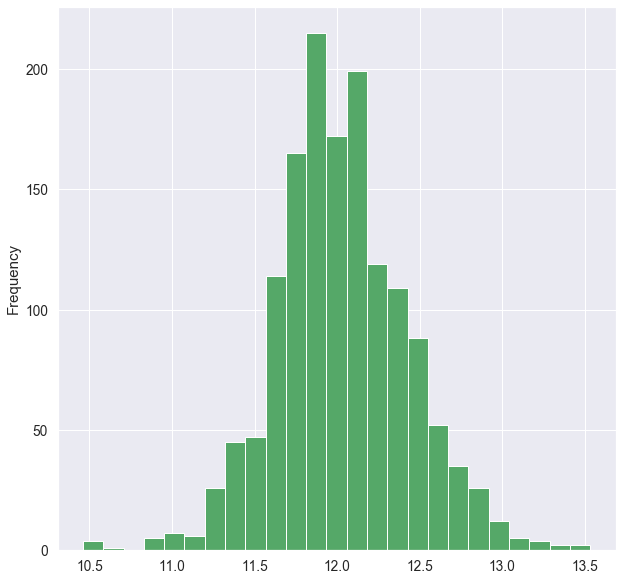

In [69]:
data2 = np.log1p(final_train_df['SalePrice'])
data2.plot( x = data2, kind = 'hist',color = 'g', figsize = (10,10), bins = 25)

## We have both the testing and training datasets using the previous feature engineering. 

* Lets implement a log transform to eliminate skewness in variables that are not normal.

In [70]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [71]:
#transform the target variable
final_train_df['SalePrice'] = np.log1p(final_train_df['SalePrice'])

#log transform the skewed numeric features, doing the training dataset first.
numeric_feats = final_train_df.dtypes[final_train_df.dtypes != "object"].index

skewed_feats = final_train_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[skewed_feats > 0.6] #if skewness is greater than .6, then it's skewed

skewed_feats = skewed_feats.index

final_train_df[skewed_feats] = np.log1p(final_train_df[skewed_feats]) #calculate for the skewed for features > .75

###  Get the dummy variables for the categorical variables

* AKA turn any categorical data into 0 or 1 (True or False)

In [72]:
final_train_df = pd.get_dummies(final_train_df)

final_test_df = pd.get_dummies(final_test_df)

In [73]:
final_test_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Transform the Target Variable

In [74]:
final_train_df['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [75]:
final_test_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## Creating Matrices for sklearn:

* Create X_train, X_test and y (predictor)

In [76]:
X_train = final_train_df.drop(['SalePrice'], axis=1)

X_test = final_test_df

y = final_train_df.SalePrice

## Lets Import Ridge and Lasso Regression 

In [77]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 6))
    
    return(rmse)

In [78]:
model_ridge = Ridge() # Create Ridge Model with this equation

### Lets test different values of Alpha

cv_ridge = Cross Validation for Ridge Regression

In [79]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30] #we're testing different values of alpha

cv_ridge = [rmse_cv(Ridge(alpha = i)).mean() for i in alphas]

In [80]:
cv_ridge = pd.Series(cv_ridge, index = alphas)

cv_ridge

0.05     0.134385
0.10     0.133572
0.30     0.131503
1.00     0.128741
3.00     0.126937
5.00     0.126672
10.00    0.127312
15.00    0.128379
30.00    0.131510
dtype: float64

#### We see that the alpha value here is 5 that gives us the lowest alpha error 
* (alpha of 5.00 =    0.126672)

In [81]:
cv_ridge.min() 

0.1266722487387864

### Lasso Model 

In [82]:
lasso_model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [83]:
rmse_cv(lasso_model).mean()

0.12238545811171853

In [84]:
coef = pd.Series(lasso_model.coef_, index = X_train.columns)

In [85]:
print("Lasso used " + str(sum(coef != 0)) + " variables and eliminated " +  str(sum(coef == 0)) + " variables")

Lasso used 111 variables and eliminated 167 variables


In [86]:
top_bottom_coefficients = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

In [87]:
top_bottom_coefficients

RoofMatl_ClyTile        -0.719931
MSZoning_C (all)        -0.290712
Condition2_PosN         -0.192897
SaleCondition_Abnorml   -0.052147
Neighborhood_Edwards    -0.051808
CentralAir_N            -0.037888
MSZoning_RM             -0.033857
SaleType_WD             -0.029943
Neighborhood_Mitchel    -0.028889
GarageCond_Fa           -0.025503
BsmtQual_Missing         0.056474
KitchenQual_Ex           0.063546
Neighborhood_NridgHt     0.065687
LotArea                  0.074082
Exterior1st_BrkFace      0.074566
Neighborhood_NoRidge     0.083997
Neighborhood_StoneBr     0.109196
Neighborhood_Crawfor     0.112956
OverallCond              0.244575
TotalSF                  0.432107
dtype: float64

### Let's now take a look at the top 10 of the coefficients, and the bottom 10 of the coefficients.

Text(0.5, 1.0, 'The Coeffiecients used in the Lasso Model')

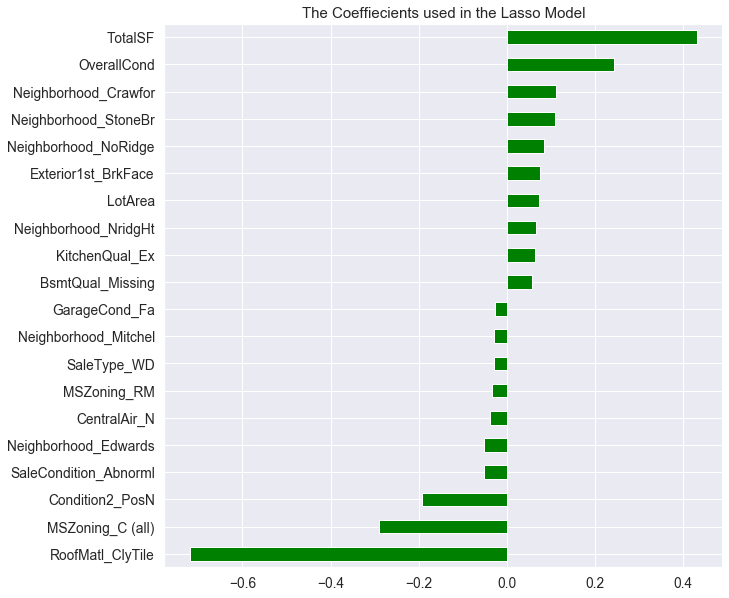

In [88]:
top_bottom_coefficients.plot(kind = "barh", figsize = (10,10), color = 'green')


plt.title("The Coeffiecients used in the Lasso Model")

### We can see here that TotalSquareFeet (TotalSF) is extremely important Feature in our data!

## Lets analyze the residuals and the residuals look scattered and there's no pattern to them. Thats a good thing.


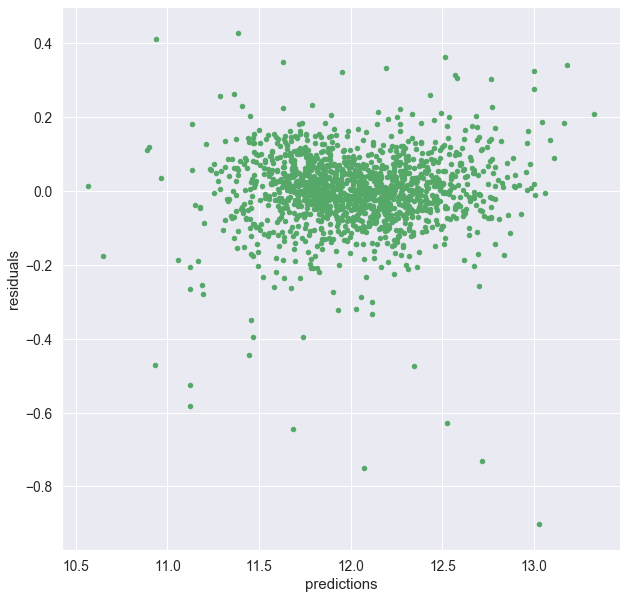

In [89]:

predictions = pd.DataFrame({"predictions":lasso_model.predict(X_train), "true":y})

predictions["residuals"] = predictions["true"] - predictions["predictions"]

predictions.plot(x = "predictions", y = "residuals",kind = "scatter", color = 'g', figsize = (10,10))

* Suggests normality.

In [ ]:
# ml things
